In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("CC GENERAL.csv")

# Drop the CUST_ID column and handle missing data
data = data.drop("CUST_ID", axis=1)
data = data.fillna(data.median())

# Feature scaling and normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


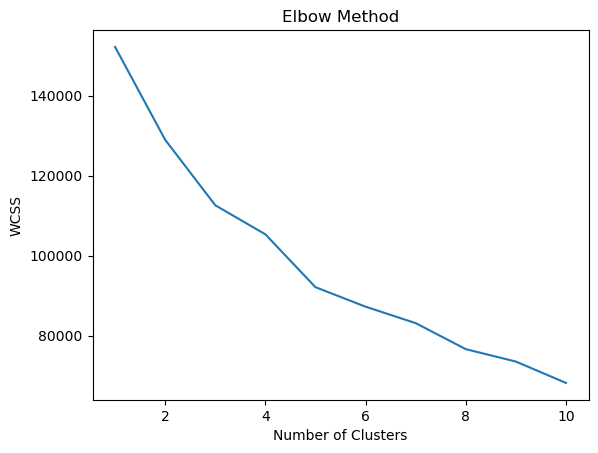

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-means clustering with the optimal number of clusters (k=4)
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(data_scaled)

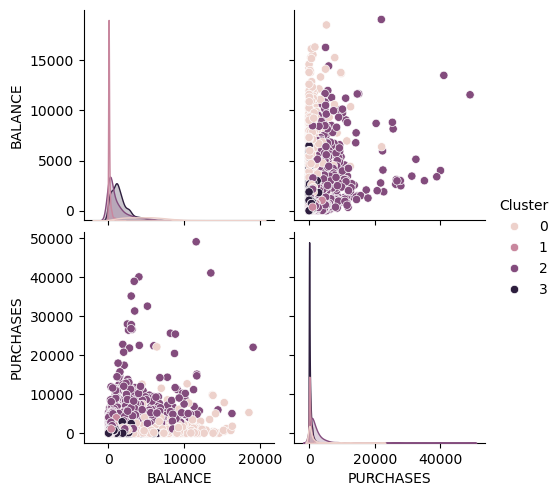

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

In [9]:
import seaborn as sns

# Add the cluster labels to the original dataset
data["Cluster"] = clusters

# Visualize the clusters using a pairplot with two selected features (e.g., BALANCE and PURCHASES)
sns.pairplot(data, vars=["BALANCE", "PURCHASES"], hue="Cluster")
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = data.groupby("Cluster").mean()
print(cluster_summary)